In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.set_printoptions(precision=2)
from sklearn import preprocessing
import pylab as pl
import scipy.optimize as opt
%matplotlib inline

# Load Data From CSV File

In [84]:
df = pd.read_csv('dataset.csv')
df.head()

,No.,material,Formula,CrystalSystem,bulk,shear,young,poisson,Hexp,best,y_cs,y_gap,y_den,y_csbg,y_csden,y_bgden
0,1,mp-66,Diamond,cubic,435.3,520.5,1116.5,0.07,96.0,H5,H1a,H2,H2,H2,H5,H2
1,2,mp-30148,BC2N,orthorhombic,361.0,422.7,912.1,0.08,76.0,H5,H2,H2,H2,H2,H2,H2
2,3,mp-629458,BC2N,orthorhombic,361.6,409.0,891.1,0.09,76.0,H5,H2,H1a,H2,H2,H2,H5
3,4,mp-1018649,c-BC5,trigonal,405.8,378.2,865.6,0.14,71.0,H2,H2,H4,H2,H2,H2,H2
4,5,mp-1639,BN,cubic,408.0,374.5,860.2,0.15,63.0,H2,H1a,H2,H2,H2,H5,H2


In [85]:
df.columns

Index(['No.', 'material', 'Formula', 'CrystalSystem', 'bulk', 'shear', 'young',
       'poisson', 'Hexp', 'best', 'y_cs', 'y_gap', 'y_den', 'y_csbg',
       'y_csden', 'y_bgden'],
      dtype='object')

# Hardness Functions

In [86]:
def H1a(B,G,Y,v):
    return 0.1475*G

def H1b(B,G,Y,v):
    return 0.0607*Y

def H2(B,G,Y,v):
    return (0.1769*G)-2.899

def H3(B,G,Y,v):
    return 0.0635*Y

def H4(B,G,Y,v):
    return ((1-2*v)*B)/(6*(1+v))

def H5(B,G,Y,v):
    k = G/B
    return (2*np.power(k*k*G,0.585))-3

lookup={"H1a":H1a, "H1b":H1b, "H2":H2, "H3":H3, "H4":H4, "H5":H5}

# Gradient Boosting Classifier

In [87]:
X = df[['bulk','shear','young','poisson']] .values  #.astype(float)
y = df['best'].values

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.6, max_depth=1, random_state=0)
gbc.fit(X, y) 
y_gbc = gbc.predict(X)

In [89]:
y_gbc

array(['H5', 'H5', 'H5', 'H2', 'H2', 'H2', 'H2', 'H5', 'H2', 'H5', 'H2',
       'H1b', 'H4', 'H1b', 'H4', 'H4', 'H2', 'H1b', 'H1a', 'H1a', 'H5',
       'H2', 'H3', 'H2', 'H5', 'H1b', 'H4', 'H4', 'H4', 'H1a', 'H1a',
       'H4', 'H2', 'H4', 'H5', 'H2', 'H4', 'H1b', 'H4', 'H1b', 'H1a',
       'H4', 'H4', 'H3', 'H3', 'H5', 'H5', 'H1a', 'H1b', 'H4', 'H4', 'H5',
       'H5', 'H4', 'H4', 'H4', 'H1a', 'H3', 'H4', 'H4', 'H5', 'H4', 'H3',
       'H5', 'H2', 'H4', 'H3', 'H3', 'H4', 'H4', 'H4', 'H4', 'H5', 'H2',
       'H1a', 'H2', 'H4', 'H3', 'H5', 'H2', 'H2', 'H1a', 'H1a', 'H3',
       'H3', 'H2', 'H1a', 'H3', 'H3', 'H5', 'H5', 'H1b', 'H1a', 'H1a',
       'H1b', 'H1b', 'H1a', 'H1a', 'H5', 'H4', 'H3', 'H5', 'H4', 'H5',
       'H5', 'H4', 'H4', 'H5', 'H4', 'H1a', 'H4', 'H4', 'H1a', 'H3',
       'H1a', 'H4', 'H2', 'H5', 'H4', 'H4', 'H2', 'H2', 'H2', 'H2', 'H2',
       'H5', 'H1b', 'H1b', 'H1b', 'H3', 'H3', 'H3', 'H3', 'H4', 'H1a',
       'H3', 'H4', 'H2', 'H5', 'H5', 'H3', 'H3', 'H2'], dtype=objec

In [90]:
length = y_gbc.size

In [91]:
H_gbc = np.zeros(length)
for i in range(0,length-1):
    function = lookup[y_gbc[i]]
    H_gbc[i] = function(df.bulk[i], df.shear[i], df.young[i], df.poisson[i])

In [92]:
H_gbc

array([92.71, 79.69, 74.89, 64.  , 63.35, 33.84, 32.5 , 33.98, 33.9 ,
       36.89, 33.51, 34.54, 30.51, 31.29, 30.78, 28.15, 28.55, 29.7 ,
       31.65, 30.13, 27.1 , 28.18, 22.79, 25.26, 24.24, 26.16, 22.65,
       24.58, 23.88, 24.51, 21.68, 20.61, 20.08, 19.79, 17.63, 19.8 ,
       19.03, 18.73, 21.95, 20.42, 17.95, 12.89, 20.13, 13.63, 13.79,
       14.32, 29.3 , 15.55, 13.51, 11.35, 11.6 , 12.56, 11.69,  9.8 ,
       12.89, 11.41, 10.8 ,  7.92, 14.09,  8.86,  9.71,  8.84,  7.58,
       11.69,  8.81, 10.21,  5.89,  6.91, 10.72,  9.27, 10.08,  8.25,
        8.04,  8.  ,  8.02,  7.82,  7.  ,  7.11,  7.47,  6.72,  6.76,
        6.98,  7.48,  7.29,  5.31,  6.14,  5.6 ,  5.1 ,  3.98,  5.04,
        5.72,  4.88,  5.07,  4.56,  4.47,  4.35,  4.4 ,  3.75,  2.89,
        2.64,  2.57,  2.34,  2.9 ,  2.53,  2.52,  2.74,  2.89,  2.04,
        2.11,  2.23,  2.5 ,  2.17,  2.01,  1.59,  1.96,  2.07,  2.99,
        1.9 ,  1.88,  1.36,  1.95,  1.44,  2.05,  0.92,  1.12, 49.09,
       25.92, 26.74,

In [93]:
from sklearn import metrics
error_gbc = np.abs(df.Hexp - H_gbc)
stddev_gbc = np.std(error_gbc)
print("All set Accuracy   = ", metrics.accuracy_score(y, y_gbc))
print("Mean abs error     = ", metrics.mean_absolute_error(df.Hexp, H_gbc))
print('Standard deviation = ', stddev_gbc)

All set Accuracy   =  0.9440559440559441
Mean abs error     =  1.1645333008969088
Standard deviation =  1.6456116287003573


# Gradient Boosting Regressor

In [94]:
X = df[['bulk','shear','young','poisson']].values  #.astype(float)
y = df['Hexp'].values

In [95]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X, y)
H_gbr = reg.predict(X)

In [96]:
H_gbr

array([95.87, 76.12, 76.12, 70.59, 62.76, 34.35, 34.1 , 32.54, 31.1 ,
       31.67, 32.26, 31.51, 30.6 , 30.86, 29.37, 29.81, 28.47, 30.86,
       28.65, 28.61, 26.8 , 25.79, 24.64, 24.28, 25.58, 25.21, 23.18,
       23.65, 22.51, 21.67, 22.95, 20.15, 19.68, 20.32, 19.71, 18.9 ,
       20.91, 18.59, 19.83, 19.22, 18.02, 16.45, 18.48, 14.66, 13.13,
       16.41, 16.37, 12.6 , 11.93, 12.8 , 11.44, 10.3 , 12.27, 11.94,
       11.12, 11.94, 10.19,  8.73, 12.5 ,  9.65,  8.56,  9.78,  7.92,
       11.24,  9.4 , 10.34,  7.8 ,  8.25, 10.88,  9.84, 10.42,  9.13,
        6.83,  7.34,  7.62,  7.35,  7.5 ,  6.03,  7.59,  6.44,  7.12,
        8.02,  7.32,  6.07,  5.44,  6.63,  5.32,  4.51,  4.27,  7.35,
        6.47,  4.26,  3.74,  3.81,  4.3 ,  4.04,  4.45,  3.36,  5.74,
        2.27,  2.57,  5.75,  2.14,  4.8 ,  2.24,  3.29,  2.14,  3.23,
        2.36,  1.88,  1.77,  2.32,  1.78,  2.18,  2.38,  1.75,  3.43,
        2.05,  2.37,  2.22,  2.11,  2.79,  2.19,  1.39,  1.41, 49.19,
       27.98, 26.09,

In [97]:
MAE_gbr = metrics.mean_absolute_error(df.Hexp, H_gbr)
error_gbr = np.abs(df.Hexp - H_gbr)
stddev_gbr = np.std(error_gbr)
print('Mean Absolu Error  = ', MAE_gbr)
print('Standard deviation = ', stddev_gbr)

Mean Absolu Error  =  0.9032806873399869
Standard deviation =  0.7293246456351304


# Figure Prediction vs Experimental

In [71]:
df.columns

Index(['No.', 'material', 'Formula', 'CrystalSystem', 'bulk', 'shear', 'young',
       'poisson', 'Hexp', 'best', 'y_cs', 'y_gap', 'y_den', 'y_csbg',
       'y_csden', 'y_bgden'],
      dtype='object')

In [72]:
df.head()

,No.,material,Formula,CrystalSystem,bulk,shear,young,poisson,Hexp,best,y_cs,y_gap,y_den,y_csbg,y_csden,y_bgden
0,1,mp-66,Diamond,cubic,435.3,520.5,1116.5,0.07,96.0,H5,H1a,H2,H2,H2,H5,H2
1,2,mp-30148,BC2N,orthorhombic,361.0,422.7,912.1,0.08,76.0,H5,H2,H2,H2,H2,H2,H2
2,3,mp-629458,BC2N,orthorhombic,361.6,409.0,891.1,0.09,76.0,H5,H2,H1a,H2,H2,H2,H5
3,4,mp-1018649,c-BC5,trigonal,405.8,378.2,865.6,0.14,71.0,H2,H2,H4,H2,H2,H2,H2
4,5,mp-1639,BN,cubic,408.0,374.5,860.2,0.15,63.0,H2,H1a,H2,H2,H2,H5,H2


In [74]:
H_exp = df['Hexp'].values
y_cla = df['y_csbg'].values

In [75]:
H_cla = np.zeros(length)
for i in range(0,length-1):
    function = lookup[y_cla[i]]
    H_cla[i] = function(df.bulk[i], df.shear[i], df.young[i], df.poisson[i])

In [76]:
H_cla

array([89.18, 71.88, 69.45, 64.  , 63.35, 33.84, 32.5 , 33.98, 22.64,
       36.89, 33.51, 27.61, 30.51, 25.07, 30.78, 28.15, 28.55, 34.96,
       31.65, 30.13, 27.1 , 25.92, 21.05, 23.48, 22.1 , 26.58, 22.65,
       36.82, 23.88, 18.79, 23.11, 22.85, 19.16, 26.64, 23.04, 18.92,
       19.03, 18.73, 29.03, 20.52, 18.33, 12.89, 20.13, 12.19, 12.51,
       17.13, 29.3 , 15.55, 12.79, 15.18, 15.57, 12.56, 11.69,  9.8 ,
       12.89, 15.62, 10.8 ,  5.08, 19.18, 11.02,  9.71,  8.84,  6.51,
       16.18,  9.76, 13.34,  4.88,  6.73, 10.72, 12.21, 10.08,  8.25,
        8.04,  8.  ,  8.02,  6.66,  8.48,  6.09,  8.64,  6.18,  6.15,
        5.47,  7.48,  6.21,  4.47,  6.14,  5.6 ,  4.12,  3.38,  8.58,
        5.72,  4.37,  5.07,  4.56,  6.17,  3.83,  5.08,  3.15,  7.57,
        3.45,  1.68,  6.67,  3.76,  2.53,  3.25,  2.74,  2.89,  3.93,
        2.82,  2.23,  0.7 ,  3.05,  1.51, -2.65, -0.55,  2.07,  2.99,
        3.  ,  1.88,  1.36,  2.69,  2.75,  2.05,  0.92,  2.44, 38.83,
       30.41, 31.9 ,

Text(0, 0.5, 'Predicted hardness (GPa)')

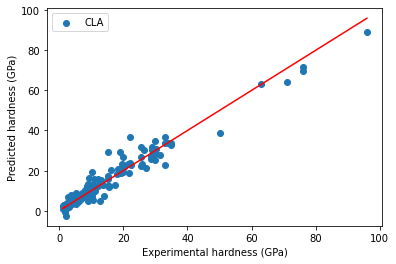

In [77]:
plt.plot(H_exp, H_exp, color='red')
plt.scatter(H_exp, H_cla, label='CLA')
plt.legend()
plt.xlabel("Experimental hardness (GPa)")
plt.ylabel("Predicted hardness (GPa)")

Text(0, 0.5, 'Predicted hardness (GPa)')

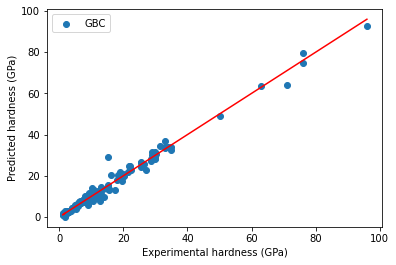

In [78]:
plt.plot(H_exp, H_exp, color='red')
plt.scatter(H_exp, H_gbc, label='GBC')
plt.legend()
plt.xlabel("Experimental hardness (GPa)")
plt.ylabel("Predicted hardness (GPa)")

Text(0, 0.5, 'Predicted hardness (GPa)')

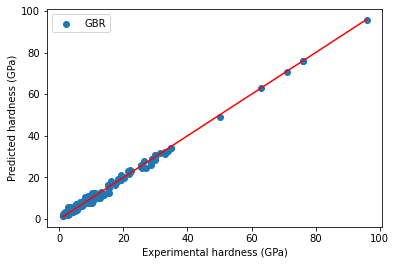

In [79]:
plt.plot(H_exp, H_exp, color='red')
plt.scatter(H_exp, H_gbr, label='GBR')
plt.legend()
plt.xlabel("Experimental hardness (GPa)")
plt.ylabel("Predicted hardness (GPa)")

In [80]:
from sklearn.metrics import r2_score
r2_cla = r2_score(H_exp, H_cla)
r2_gbc = r2_score(H_exp, H_gbc)
r2_gbr = r2_score(H_exp, H_gbr)
print("R2 CLA  = ", r2_cla)
print("R2 GBC  = ", r2_gbc)
print("R2 GBR  = ", r2_gbr)

R2 CLA  =  0.9475393556755983
R2 GBC  =  0.9831589025159361
R2 GBR  =  0.9944148710753455


# Write data to CSV file

In [81]:
df['Hx_cla'] = H_cla
df['yx_gbc'] = y_gbc
df['Hx_gbc'] = H_gbc
df['Hx_gbr'] = H_gbr

In [82]:
df.to_excel('prediction_dataset.xls', index=False)

# The Classic Algorithm

In [47]:
csyst = 'Cubic'
bandgap = 'Semiconductor'
density = 'High'
cla_1 = 'n/a'
cla_2 = 'n/a'
cla_3 = 'n/a'

In [48]:
if csyst == 'Cubic' and bandgap == 'Metal': 
    cla_1 = 'H1a'
if csyst == 'Hexagonal' and bandgap == 'Semiconductor':
    cla_1 = 'H1a'
if csyst == 'Tetragonal' and bandgap == 'Semiconductor':
    cla_1 = 'H1a'
if csyst == 'Hexagonal' and bandgap == 'Insulator':
    cla_1 = 'H1b'
if csyst == 'Cubic' and bandgap == 'Insulator':
    cla_1 = 'H2'
if csyst == 'Monoclinic' and bandgap == 'Insulator':
    cla_1 = 'H2'
if csyst == 'Orthorhombic' and bandgap == 'Insulator':
    cla_1 = 'H2'
if csyst == 'Orthorhombic' and bandgap == 'Semiconductor':
    cla_1 = 'H2'
if csyst == 'Trigonal' and bandgap == 'Insulator':
    cla_1 = 'H2'
if csyst == 'Trigonal' and bandgap == 'Metal':
    cla_1 = 'H2'
if csyst == 'Trigonal' and bandgap == 'Semiconductor':
    cla_1 = 'H2'
if csyst == 'Hexagonal' and bandgap == 'Metal':
    cla_1 = 'H4'
if csyst == 'Monoclinic' and bandgap == 'Metal':
    cla_1 = 'H4'
if csyst == 'Monoclinic' and bandgap == 'Semiconductor':
    cla_1 = 'H4'
if csyst == 'Orthorhombic' and bandgap == 'Metal':
    cla_1 = 'H4'
if csyst == 'Tetragonal' and bandgap == 'Insulator':
    cla_1 = 'H4'
if csyst == 'Tetragonal' and bandgap == 'Metal':
    cla_1 = 'H4'
if csyst == 'Triclinic' and bandgap == 'Metal':
    cla_1 = 'H4'
if csyst == 'Cubic' and bandgap == 'Semiconductor':
    cla_1 = 'H5'
if csyst == 'Triclinic' and bandgap == 'Insulator':
    cla_1 = 'H5'
if csyst == 'Triclinic' and bandgap == 'Semiconductor':
    cla_1 = 'H5'

In [49]:
cla_1

'H5'

In [50]:
if csyst == 'Cubic' and density == 'High':
    cla_2 = 'H1a'
if csyst == 'Cubic' and density == 'Low':
    cla_2 = 'H5'
if csyst == 'Cubic' and density == 'Medium':
    cla_2 = 'H1a'
if csyst == 'Hexagonal' and density == 'High':
    cla_2 = 'H4'
if csyst == 'Hexagonal' and density == 'Low':
    cla_2 = 'H1b'
if csyst == 'Hexagonal' and density == 'Medium':
    cla_2 = 'H4'
if csyst == 'Monoclinic' and density == 'Low':
    cla_2 = 'H1b'
if csyst == 'Monoclinic' and density == 'Medium':
    cla_2 = 'H4'
if csyst == 'Orthorhombic' and density == 'High':
    cla_2 = 'H1a'
if csyst == 'Orthorhombic' and density == 'Low':
    cla_2 = 'H2'
if csyst == 'Orthorhombic' and density == 'Medium':
    cla_2 = 'H4'
if csyst == 'Tetragonal' and density == 'High':
    cla_2 = 'H3'
if csyst == 'Tetragonal' and density == 'Low':
    cla_2 = 'H2'
if csyst == 'Tetragonal' and density == 'Medium':
    cla_2 = 'H4'
if csyst == 'Triclinic' and density == 'Low':
    cla_2 = 'H5'
if csyst == 'Triclinic' and density == 'Medium':
    cla_2 = 'H4'
if csyst == 'Trigonal' and density == 'Low':
    cla_2 = 'H2'
if csyst == 'Trigonal' and density == 'Medium':
    cla_2 = 'H4'

In [51]:
cla_2

'H1a'

In [52]:
if density == 'Low' and bandgap == 'Insulator':
    cla_3 = 'H2'
if density == 'Low' and bandgap == 'Metal':
    cla_3 = 'H2'
if density == 'Low' and bandgap == 'Semiconductor':
    cla_3 = 'H5'
if density == 'Medium' and bandgap == 'Insulator':
    cla_3 = 'H2'
if density == 'Medium' and bandgap == 'Metal':
    cla_3 = 'H4'
if density == 'Medium' and bandgap == 'Semiconductor':
    cla_3 = 'H4'
if density == 'High' and bandgap == 'Metal':
    cla_3 = 'H4'
if density == 'High' and bandgap == 'Semiconductor':
    cla_3 = 'H3'

In [53]:
cla_3

'H3'